## OTT Platform Case Study - Customer Purchase Behavior
### What This Does: Look at how people buy things by country for two groups
- Group A: People who joined without a coupon
- Group B: People who joined with a coupon
- Numbers to Check: How many new customers, money from first buys, repeat buyers, money from repeats
- Result: A table and picture to help decide what to do next

## Importing Libraries

In [1]:
# Get the tools we need to work with data
import pandas as pd  # For handling data tables
import numpy as np   # For simple math
import matplotlib.pyplot as plt  # For making pictures
import seaborn as sns  # For nice charts
from datetime import datetime  # To work with dates
print("I got all the tools I need!")

I got all the tools I need!


## Step 1: Loading the Data
Bring in all the data sheets from the Excel file.

In [2]:
# Tell the program where our Excel file is
file_location = 'Revenue.xlsx'  # Make sure this file is in the same folder

# Load each sheet into its own data table
revenue_data = pd.read_excel(file_location, sheet_name='revenue')
plan_data = pd.read_excel(file_location, sheet_name='plan')
countries_data = pd.read_excel(file_location, sheet_name='countries')
subscription_data = pd.read_excel(file_location, sheet_name='subscription')
customers_data = pd.read_excel(file_location, sheet_name='customers')

## Step 2: Looking at the Data
Check the first few rows and sizes of our data tables.

In [3]:
# Look at the first few rows of each data table
print("First rows of revenue data:\n", revenue_data.head(), "\n")
print("First rows of plan data:\n", plan_data.head(), "\n")
print("First rows of countries data:\n", countries_data.head(), "\n")
print("First rows of subscription data:\n", subscription_data.head(), "\n")
print("First rows of customers data:\n", customers_data.iloc[:, :4].head(), "\n")  # Show only first 4 columns to keep it simple

# Check how big each data table is
print("Sizes of data tables:\nRevenue:", revenue_data.shape,
      "\nPlan:", plan_data.shape,
      "\nCountries:", countries_data.shape,
      "\nSubscription:", subscription_data.shape,
      "\nCustomers:", customers_data.shape)

# Check how big each data table is
print("Data infos of each data tables:")
print("Revenue data:")
print(revenue_data.info())
print("\nPlan data:")
print(plan_data.info())
print("\nCountries data:")
print(countries_data.info())
print("\nSubscription data:")
print(subscription_data.info())
print("\nCountries data:")
print(customers_data.info())

First rows of revenue data:
        order_id                    transaction_id            payment_date  \
0  ORD000083071  56E2321457954E9AB02489B196C16449  Sunday, March 23, 2025   
1  ORD000030497  E68ACDA4ED594B03856431919C29CDCD              2025-01-02   
2  ORD000082941  5E4592F614254DEFA383B47A4A99C2F8              2025-08-11   
3  ORD000002640  7C57DDAC85DF4910A9D0D1B0BCCCB15E   Sunday, March 2, 2025   
4  ORD000002641  00399D7FD2EF4DFC8B3218AAACCFCB77     Monday, May 5, 2025   

   amount  plan_id payment_method coupon_code  
0   69.45        2     google_pay    SPRING20  
1   81.27        3      apple_pay         NaN  
2  140.42        2         paypal         NaN  
3   32.62        1  bank_transfer         NaN  
4   82.55        3  bank_transfer         NaN   

First rows of plan data:
   plan_name  Id
0  12-Month   2
1   6-Month   3
2   3-Month   1
3   Monthly   4 

First rows of countries data:
     id           country_name
0  105                  Samoa
1  106             

## Step 3: Cleaning the Data
Fix dates, money amounts, and remove extra or wrong entries.

In [4]:
# Fix the dates in the revenue data to be readable
revenue_data['payment_date'] = pd.to_datetime(revenue_data['payment_date'], errors='coerce')
# Remove rows where dates are missing
revenue_data = revenue_data.dropna(subset=['payment_date'])

# Make sure amounts are numbers and not less than Zero
revenue_data['amount'] = pd.to_numeric(revenue_data['amount'], errors='coerce')
revenue_data = revenue_data[revenue_data['amount']>0]
# Remove rows where amounts are missing
revenue_data = revenue_data.dropna(subset=['amount'])

# Remove any duplicate rows
revenue_data = revenue_data.drop_duplicates()

# Change '#N/A' in coupons to an empty string
revenue_data['coupon_code'] = revenue_data['coupon_code'].replace('#N/A', '')

# Clean customers data by removing extra columns
customers_data = customers_data.loc[:, ~customers_data.columns.str.contains('^Unnamed')]

# Remove duplicate rows from subscription data
subscription_data = subscription_data.drop_duplicates()

# Show the new sizes to check cleaning worked
print("New sizes after cleaning:\nRevenue:", revenue_data.shape,
      "\nCustomers:", customers_data.shape,
      "\nSubscription:", subscription_data.shape)

New sizes after cleaning:
Revenue: (30598, 7) 
Customers: (50694, 4) 
Subscription: (101071, 4)


## Step 4: Putting Data Together
Combine all data tables into one big table.

In [5]:
# Start by combining revenue and subscription data using order_id
final_table = pd.merge(revenue_data, subscription_data, on='order_id', how='inner')
# Remove the extra plan_id column we don’t need
final_table = final_table.drop(columns=['plan_id_y'])
# Rename the remaining plan_id to avoid confusion
final_table = final_table.rename(columns={'plan_id_x': 'plan_id'})

# Add customer details using customer_id
final_table = pd.merge(final_table, customers_data, left_on='customer_id', right_on='id', how='inner')

# Add country names using country_id
final_table = pd.merge(final_table, countries_data, left_on='country_id', right_on='id', how='inner')

# Add plan names using plan_id
final_table = pd.merge(final_table, plan_data, left_on='plan_id', right_on='Id', how='inner')

# Keep only the columns we want to use
final_table = final_table[['order_id', 'payment_date', 'amount', 'coupon_code', 
                       'customer_id', 'email', 'name', 'country_name', 'plan_name']]

# Show the size of our new final table
# print("New final data table size:", final_table.shape)
final_table.head()

,order_id,payment_date,amount,coupon_code,customer_id,email,name,country_name,plan_name
0,ORD000083071,2025-03-23,69.45,SPRING20,1007,adela.abebe3614@yahoo.com,Adela Abebe,Samoa,12-Month
1,ORD000002640,2025-03-02,32.62,NaN,1010,adela.abebe7189@gmail.com,Adela Abebe,Republic of the Congo,3-Month
2,ORD000002641,2025-05-05,82.55,NaN,1010,adela.abebe7189@gmail.com,Adela Abebe,Republic of the Congo,6-Month
3,ORD000050557,2025-05-17,13.71,NaN,1014,adela.adams5628@mail.com,Adela Adams,Sweden,Monthly
4,323da443-3a12-4e22-921b-6119903746f4,2025-05-17,13.71,NaN,1015,adela.adams5628@mail.com.dup1,Adela Adams,Sweden,Monthly


## Step 5: Looking at the Data
See how much money comes from each country and make a simple picture.

Top 5 countries with the most money:
      country_name  orders  total_revenue  avg_order_value
79      Martinique    3268      120340.05            36.82
101         Panama     702       37383.42            53.25
109          Qatar     725       32309.90            44.57
148  United States     672       29400.17            43.75
142   Turkmenistan     701       28956.05            41.31


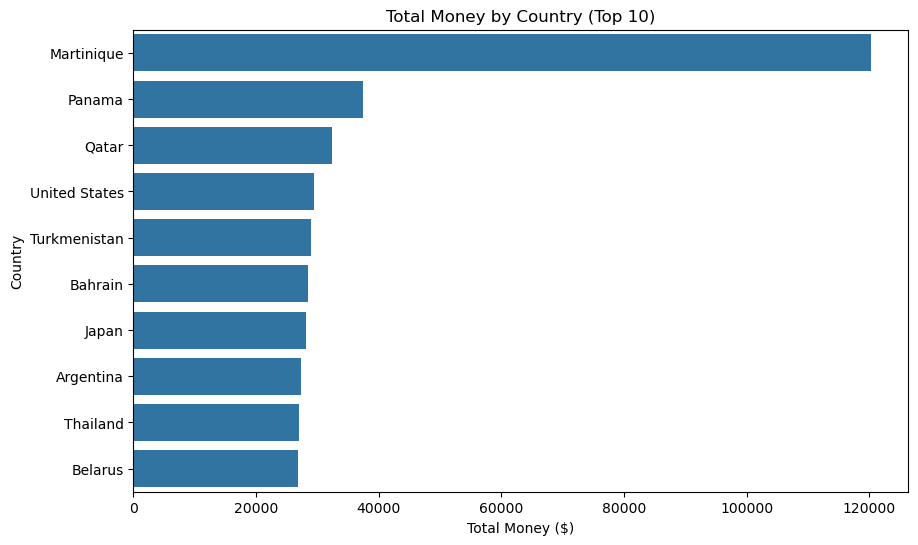

In [6]:
# Group the data by country to see totals
country_totals = final_table.groupby('country_name').agg(
    orders=('order_id', 'count'),  # Count how many orders
    total_revenue=('amount', 'sum'),  # Add up all amount
    avg_order_value=('amount', 'mean')  # Average money per order
).reset_index()

# Round the revenue numbers to 2 decimal places
country_totals['total_revenue'] = country_totals['total_revenue'].round(2)
country_totals['avg_order_value'] = country_totals['avg_order_value'].round(2)

# Sort by total revenue to see the biggest countries
country_totals = country_totals.sort_values('total_revenue', ascending=False)

# Show the top 5 countries
print("Top 5 countries with the most money:")
print(country_totals.head())

# Make a picture of the top 10 countries' total money
top_10_countries = country_totals.head(10)
plt.figure(figsize=(10, 6))  # Set the picture size
sns.barplot(x='total_revenue', y='country_name', data=top_10_countries)  # Make bars
plt.title('Total Money by Country (Top 10)')  # Add a title
plt.xlabel('Total Money ($)')  # Label the bottom
plt.ylabel('Country')  # Label the side
plt.show()  # Show the picture

## Step 6: Checking Two Groups
Look at Group A and Group B by country with numbers and a picture.

Group Analysis by Country:
          country_name                cohort  unique_customers  \
0          Afghanistan  Cohort A (Non-Offer)               238   
1          Afghanistan      Cohort B (Offer)               243   
2              Albania  Cohort A (Non-Offer)                77   
3              Albania      Cohort B (Offer)                58   
4              Algeria  Cohort A (Non-Offer)                43   
5              Algeria      Cohort B (Offer)                92   
6               Angola  Cohort A (Non-Offer)                84   
7               Angola      Cohort B (Offer)                44   
8  Antigua and Barbuda  Cohort A (Non-Offer)                63   
9  Antigua and Barbuda      Cohort B (Offer)                90   

   first_purchase_revenue  repeat_customers  total_repeat_revenue  \
0                 7912.58                44               4953.66   
1                 7365.23                79               7550.56   
2                 2999.93              

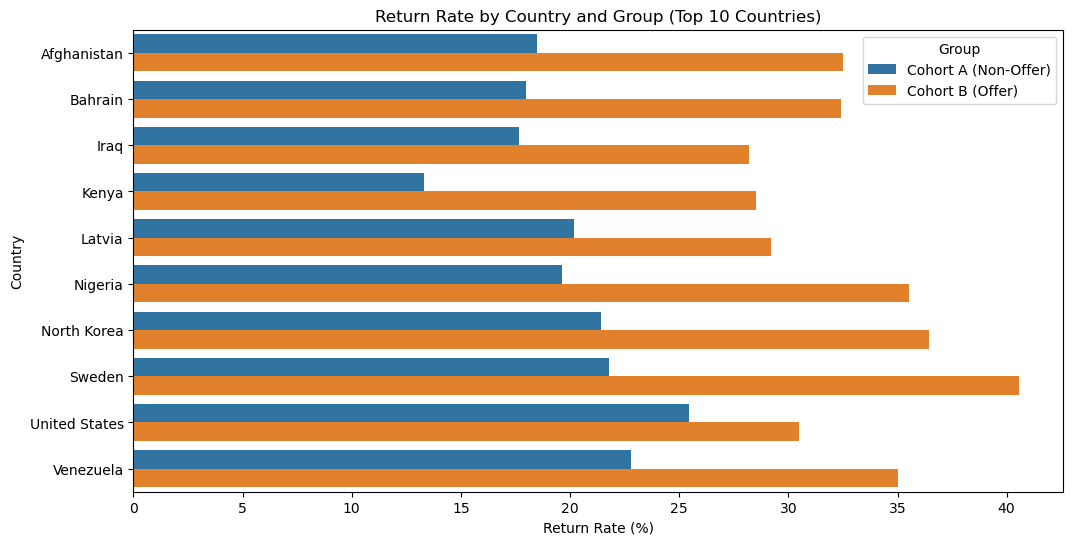

In [7]:
# Find the first purchase for each person
sorted_data = final_table.sort_values(['customer_id', 'payment_date'])  # Sort by customer and date
first_purchases = sorted_data.groupby('customer_id').first().reset_index()  # Get the first row per customer

# Decide if someone is in Group A or Group B
first_purchases['cohort'] = np.where(first_purchases['coupon_code'].isna() | (first_purchases['coupon_code'] == ''), 
                                    'Cohort A (Non-Offer)', 'Cohort B (Offer)')  # No coupon = A, coupon = B

# Count new customers and first buy money by country and group
country_group_summary = first_purchases.groupby(['country_name', 'cohort']).agg(
    unique_customers=('customer_id', 'nunique'),  # Count unique customers
    first_purchase_revenue=('amount', 'sum')  # Add up first buy money
).reset_index()

# Find people who bought more than once
order_counts = final_table.groupby('customer_id').size().reset_index(name='order_count')  # Count orders per customer
repeat_customers_list = order_counts[order_counts['order_count'] > 1]['customer_id']  # Get customers with repeats

# Match repeat customers with their group
repeat_with_group = pd.merge(repeat_customers_list, 
                             first_purchases[['customer_id', 'cohort', 'country_name']], 
                             on='customer_id', how='left')

# Split into Group A and Group B repeat customers
repeat_a_customers = repeat_with_group[repeat_with_group['cohort'] == 'Cohort A (Non-Offer)']['customer_id']
repeat_b_customers = repeat_with_group[repeat_with_group['cohort'] == 'Cohort B (Offer)']['customer_id']

# Add group info to the big table
big_table_with_group = pd.merge(final_table, 
                               first_purchases[['customer_id', 'cohort']], 
                               on='customer_id', how='left')

# Get data for Group A repeats
repeat_a_data = big_table_with_group[big_table_with_group['customer_id'].isin(repeat_a_customers)]
repeat_a_summary = repeat_a_data.groupby(['country_name', 'cohort']).agg(
    repeat_customers=('customer_id', 'nunique'),  # Count repeat buyers
    total_repeat_revenue=('amount', 'sum')  # Add up repeat money
).reset_index()

# Get data for Group B repeats
repeat_b_data = big_table_with_group[big_table_with_group['customer_id'].isin(repeat_b_customers)]
repeat_b_summary = repeat_b_data.groupby(['country_name', 'cohort']).agg(
    repeat_customers=('customer_id', 'nunique'),  # Count repeat buyers
    total_repeat_revenue=('amount', 'sum')  # Add up repeat money
).reset_index()

# Put all repeat data together
all_repeat_summary = pd.concat([repeat_a_summary, repeat_b_summary])

# Combine first buy and repeat data
final_table = pd.merge(country_group_summary, all_repeat_summary, 
                      on=['country_name', 'cohort'], how='left')

# Fill in zeros where there are no repeats
final_table['repeat_customers'] = final_table['repeat_customers'].fillna(0).astype(int)
final_table['total_repeat_revenue'] = final_table['total_repeat_revenue'].fillna(0).round(2)

# Round the first buy money
final_table['first_purchase_revenue'] = final_table['first_purchase_revenue'].round(2)

# Calculate how many return as a percentage
final_table['retention_rate'] = (final_table['repeat_customers'] / final_table['unique_customers'] * 100).round(2)
# Calculate ARPU for each customers 
final_table['arpu first purchase'] = (final_table['first_purchase_revenue'] / final_table['unique_customers'])
final_table['arpu repeat purchase'] = (final_table['total_repeat_revenue'] / final_table['repeat_customers'])
# Sort the table by country and group
final_table = final_table.sort_values(['country_name', 'cohort'])
# CLV for country cohorts
final_table['CLV'] = (final_table['first_purchase_revenue'] + final_table['total_repeat_revenue']) / final_table['unique_customers']

# Show the first 10 rows of the table
print("Group Analysis by Country:")
print(final_table.head(10))

# Make a picture of return rates for the top 10 countries
top_countries_list = final_table.groupby('country_name')['unique_customers'].sum().nlargest(10).index
plot_data = final_table[final_table['country_name'].isin(top_countries_list)]
plt.figure(figsize=(12, 6))  # Set picture size
sns.barplot(x='retention_rate', y='country_name', hue='cohort', data=plot_data)  # Make bars with groups
plt.title('Return Rate by Country and Group (Top 10 Countries)')  # Add title
plt.xlabel('Return Rate (%)')  # Label bottom
plt.ylabel('Country')  # Label side
plt.legend(title='Group')  # Add a key for groups
plt.show()  # Show the picture

# Save the table to a file for the report 
final_table.to_csv('Country wise cohort.csv', index=False)

This work shows how Group A and Group B buy things by country. The table and picture can help decide to focus on countries where Group B comes back more, like Sweden.

## Step 7: Plan Analysis
### Now lets dive in deep in the analysis to see how users are behaving based on plans used by them and analyze them

In [8]:
# Aggregate metrics by the plan of the first purchase (using plan_name since it's available)

# From first_purchases (which has plan_name from the first purchase)
plan_group_summary = first_purchases.groupby('plan_name').agg(
    unique_customers=('customer_id', 'nunique'),
    first_purchase_revenue=('amount', 'sum')
).reset_index()

# Correctly calculate repeat revenue (excluding first purchase amounts)
# Total revenue per customer
total_revenue_per_customer = sorted_data.groupby('customer_id')['amount'].sum()

# First purchase revenue per customer
first_revenue_per_customer = first_purchases.set_index('customer_id')['amount']

# Repeat revenue per customer (total - first)
repeat_revenue_per_customer = total_revenue_per_customer - first_revenue_per_customer

# Filter only customers with repeat revenue > 0 (i.e., repeat customers)
repeat_revenue_per_customer = repeat_revenue_per_customer[repeat_revenue_per_customer > 0]

# Create a DataFrame for repeat customers
repeat_df = pd.DataFrame({'customer_id': repeat_revenue_per_customer.index, 'repeat_revenue': repeat_revenue_per_customer.values})

# Add plan_name from first_purchases
repeat_df = pd.merge(repeat_df, first_purchases[['customer_id', 'plan_name']], on='customer_id', how='left')

# Summarize repeats by plan_name
repeat_summary = repeat_df.groupby('plan_name').agg(
    repeat_customers=('customer_id', 'count'),
    total_repeat_revenue=('repeat_revenue', 'sum')
).reset_index()

# Merge with plan_group_summary
plan_final_table = pd.merge(plan_group_summary, repeat_summary, on='plan_name', how='left')

# Fill missing values
plan_final_table['repeat_customers'] = plan_final_table['repeat_customers'].fillna(0).astype(int)
plan_final_table['total_repeat_revenue'] = plan_final_table['total_repeat_revenue'].fillna(0).round(2)

# Round first purchase revenue
plan_final_table['first_purchase_revenue'] = plan_final_table['first_purchase_revenue'].round(2)

# Calculate retention rate
plan_final_table['retention_rate'] = (plan_final_table['repeat_customers'] / plan_final_table['unique_customers'] * 100).round(2)

# Sort by plan_name (or you can sort by unique_customers descending if preferred)
plan_final_table = plan_final_table.sort_values('plan_name')
# Calculate CLV by plan
plan_final_table['CLV'] = (plan_final_table['first_purchase_revenue'] + plan_final_table['total_repeat_revenue']) / plan_final_table['unique_customers']

# Print the table
print("Analysis by Plan:")
print(plan_final_table)

# Save the table to a file for the report 
plan_final_table.to_csv('Plan based analysis.csv', index=False)

Analysis by Plan:
  plan_name  unique_customers  first_purchase_revenue  repeat_customers  \
0  12-Month              2128               248739.27               677   
1   3-Month              4277               151347.41              1431   
2   6-Month              3249               207246.82               990   
3   Monthly             11712               150685.35              3825   

   total_repeat_revenue  retention_rate         CLV  
0             173891.49           31.81  198.604680  
1             133726.30           33.46   66.652726  
2             265992.11           30.47  145.656796  
3             197884.27           32.66   29.761750  


### Step 8: Plotting Plan-Wise Bar Chart for Unique and Repeat Customers

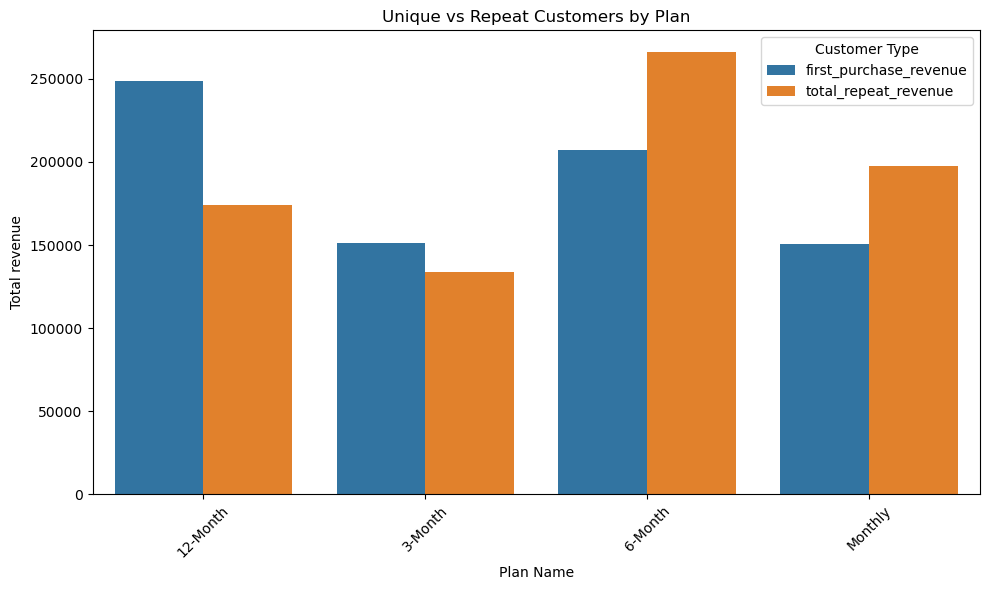

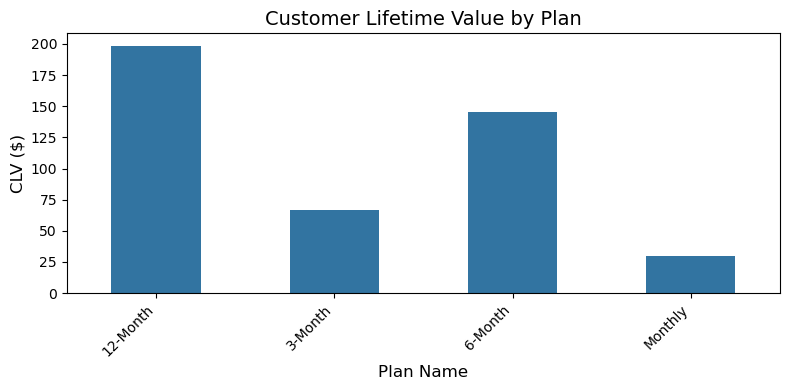

In [9]:
# Create a bar chart to compare unique customers and repeat customers by plan

# Import plotting libraries (already imported, but ensuring they're available)
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting (using plan_final_table from Step 7)
# Melt the dataframe to have unique and repeat customers in one column for easier plotting
plot_data = plan_final_table.melt(id_vars=['plan_name'], 
                                  value_vars=['first_purchase_revenue', 'total_repeat_revenue'],
                                  var_name='Customer_Type', 
                                  value_name='Total revenue')

# Create the bar chart
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x='plan_name', y='Total revenue', hue='Customer_Type', data=plot_data)

# Customize the plot
plt.title('Unique vs Repeat Customers by Plan')  # Add title
plt.xlabel('Plan Name')  # Label x-axis
plt.ylabel('Total revenue')  # Label y-axis
plt.legend(title='Customer Type')  # Add legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Bar-chart based on clv per plan wise
plt.figure(figsize=(8, 4))

# Reduce bar thickness using width parameter
sns.barplot(x='plan_name', y='CLV', data=plan_final_table, width=0.5)

# Improve title and axis labels
plt.title('Customer Lifetime Value by Plan', fontsize=14)
plt.xlabel('Plan Name', fontsize=12)
plt.ylabel('CLV ($)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Tight layout and save
plt.tight_layout()
plt.savefig('plan_clv_chart.png', dpi=300)  # Higher resolution for report
plt.show()